# Max Change Algorithmn for Various N, K
Date: 3.12.2024

In [8]:
import os
os.chdir(r'C:\Users\v-kirdwivedi\Documents\GitHub\MatchingAlgorithm')

In [17]:
import multi_funcs as mf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import itertools


### Simulations!!!

mf.gs_simulate_nx_max_lengths((5000, 4))

ks = [4, 5, 6, 7, 8, 9, 10]
ns = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
for k in ks:
    for n in ns:
        results = mf.gs_f_simulate_nx_max_lengths(10000, n, k)
        df = mf.make_df_max_match_length_MM(n, k, results, save=True)

### Table

In [13]:
def prep(k, n):
    df = pd.read_csv(f'data/simulations/max_matching_lengths/n_{n}_k_{k}_max_length_cycles.csv')
    df = df.sort_values(by=['cycle_lengths']).reset_index(drop=True)
    df = df.iloc[:-10, :]
    nbins = 5*k
    if k == 3:
        nbins = 8
    df['binned'] = pd.cut(df['cycle_lengths'], bins = nbins, include_lowest=True)
    df['binned'] = df["binned"].apply(lambda x: x.left)
    grouped = df.groupby('binned').size()/len(df)
    x = pd.DataFrame(grouped).reset_index(drop=False)
    x['1-CDF'] = 1 - x[0].cumsum()
    x['log'] = np.log(x['1-CDF'])
    return x.iloc[:-1,:]

In [22]:
ks = [4, 5, 6, 7, 8, 9, 10]
ns = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

In [23]:
def regress(n,k):
    df2 = prep(k, n)
    res2 = stats.linregress(x=df2['binned'], y=df2['log'])
    return res2

In [35]:
df = pd.DataFrame(list(itertools.product(ns, ks)))


In [36]:
df[0] = df[0].astype(int)
df[1] = df[1].astype(int)

In [37]:
df['intercept'] = df.apply(lambda x: regress(x[0], x[1]).intercept, axis=1)

c:\ProgramData\anaconda3\envs\CatchALL_20231003\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\ProgramData\anaconda3\envs\CatchALL_20231003\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\ProgramData\anaconda3\envs\CatchALL_20231003\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\ProgramData\anaconda3\envs\CatchALL_20231003\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\ProgramData\anaconda3\envs\CatchALL_20231003\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Prog

In [39]:
df[0] = df[0].astype(int)
df[1] = df[1].astype(int)

In [41]:
df['beta_1'] = df.apply(lambda x: regress(int(x[0]), int(x[1])).slope, axis=1)

c:\ProgramData\anaconda3\envs\CatchALL_20231003\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\ProgramData\anaconda3\envs\CatchALL_20231003\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\ProgramData\anaconda3\envs\CatchALL_20231003\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\ProgramData\anaconda3\envs\CatchALL_20231003\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\ProgramData\anaconda3\envs\CatchALL_20231003\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Prog

In [42]:
df

,0,1,intercept,beta_1
0,100,4,0.378428,-0.447571
1,100,5,0.387394,-0.330036
2,100,6,0.447291,-0.242933
3,100,7,0.534397,-0.199515
4,100,8,0.667533,-0.176497
...,...,...,...,...
65,1000,6,0.127237,-0.050949
66,1000,7,0.182728,-0.032032
67,1000,8,0.284813,-0.024601
68,1000,9,0.213875,-0.019067


In [45]:
df.columns = ['n', 'k', 'intercept', 'beta_1']
pivoted = df.pivot_table(index=['n', 'k'], values=['intercept', 'beta_1'])
pivoted.to_excel(r'outputs\regression_results.xlsx')

### Graph

In [58]:
def make_graph(k):
    fig, ax = plt.subplots(2, 5, figsize=(50, 10))
    
    for i in range(10):
        df = prep(k, ns[i])
        sns.regplot(x='binned', y='log', data=df, ax=ax[i//5, i%5], color = 'blue', label='MM')
        res1 = stats.linregress(x=df['binned'], y=df['log'])
        ax[i//5, i%5].text(0.7, 0.8, 'y = ' + str(round(res1.intercept, 4))+'+'+str(round(res1.slope,4))+'x', transform = ax[i//5, i%5].transAxes, color = 'blue')
        ax[i//5, i%5].set_title(f'k = {k}, n = {ns[i]}')
        ax[i//5, i%5].set_xlabel('Cycle Lengths')
        ax[i//5, i%5].legend()
        
    plt.savefig(f'outputs/regression_plots/k_{k}.png', dpi= 300)

c:\ProgramData\anaconda3\envs\CatchALL_20231003\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\ProgramData\anaconda3\envs\CatchALL_20231003\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\ProgramData\anaconda3\envs\CatchALL_20231003\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\ProgramData\anaconda3\envs\CatchALL_20231003\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\ProgramData\anaconda3\envs\CatchALL_20231003\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Prog

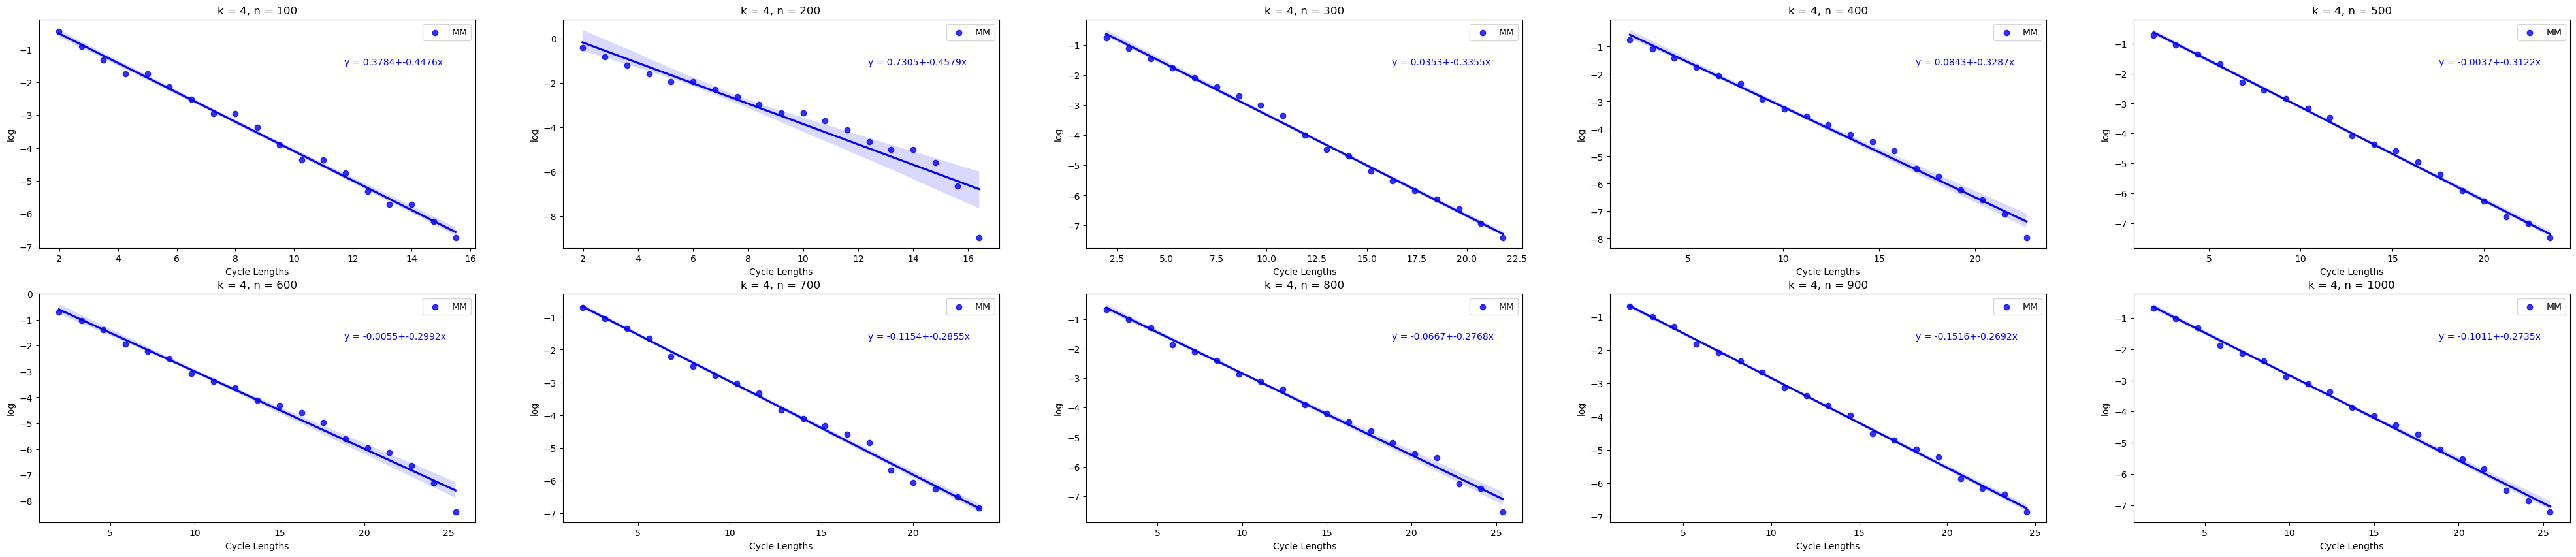

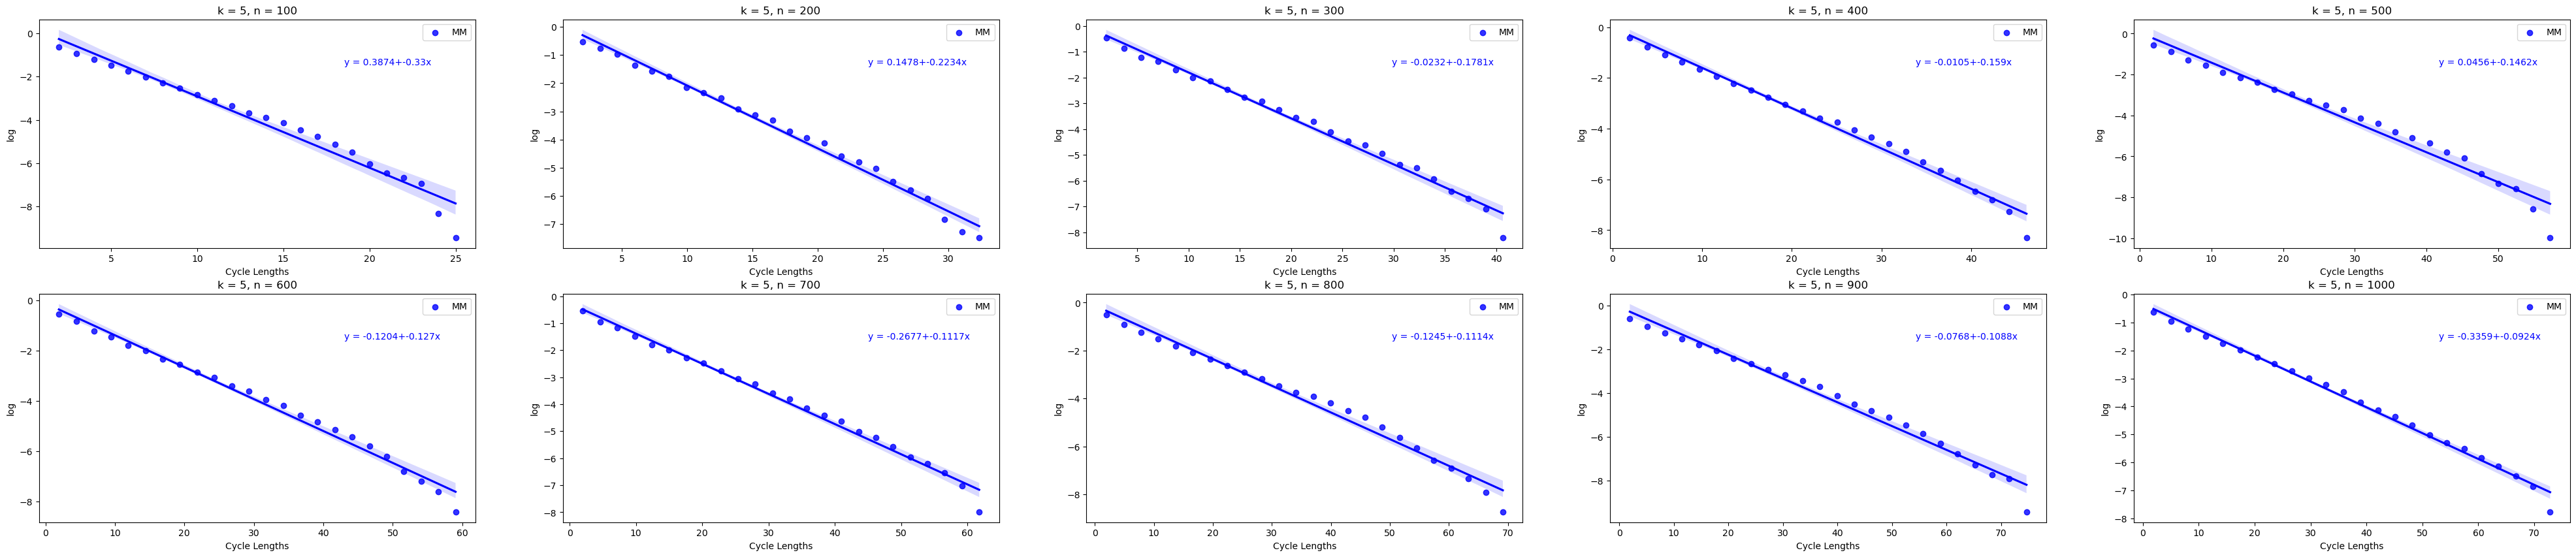

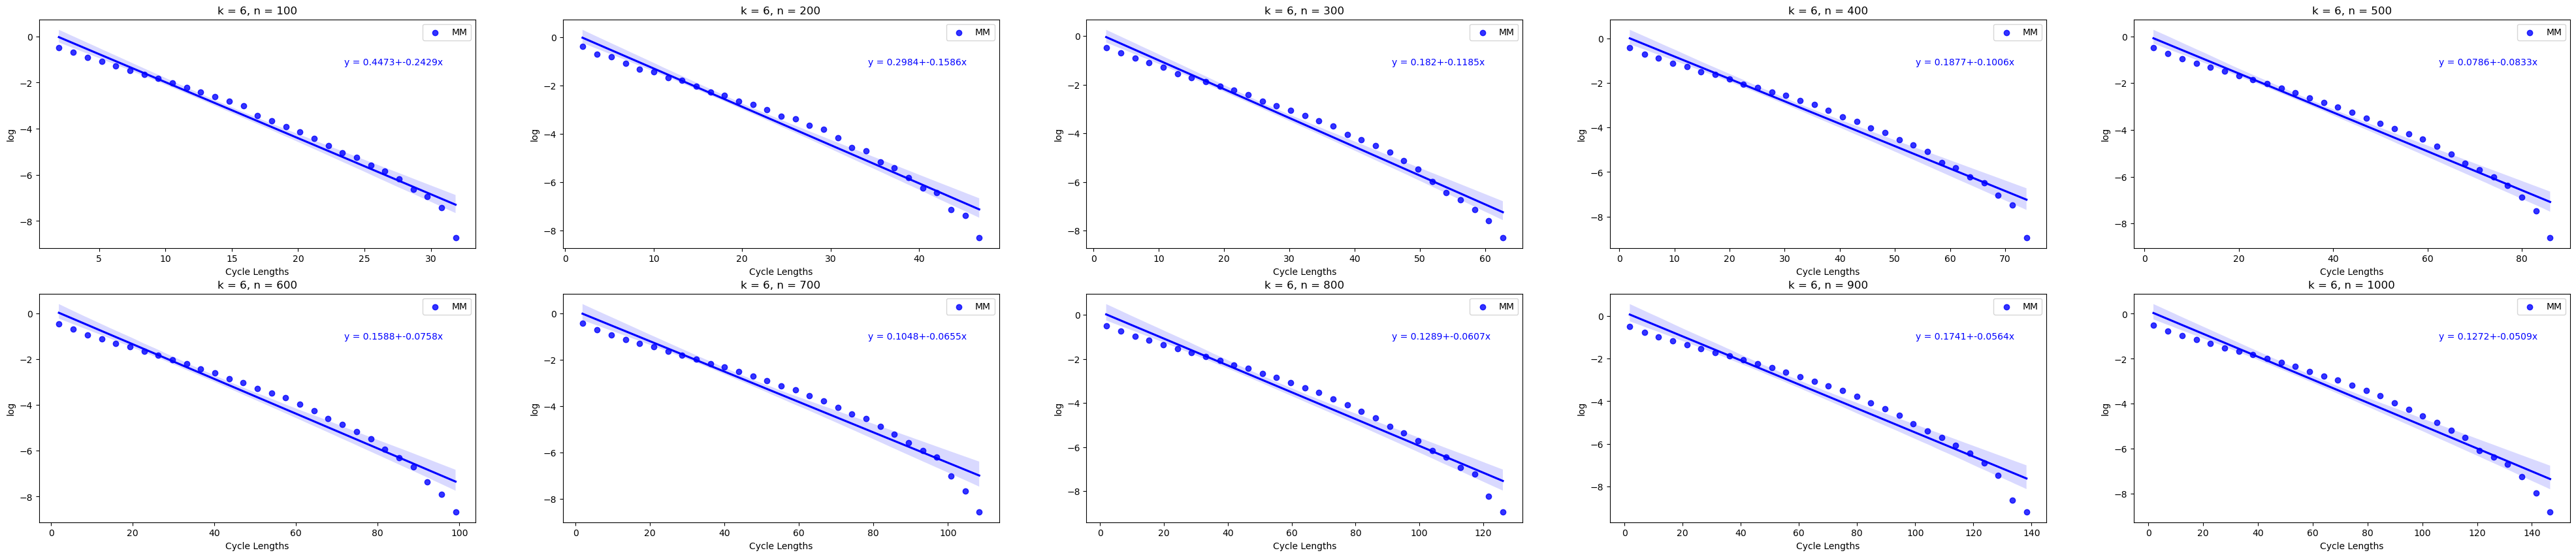

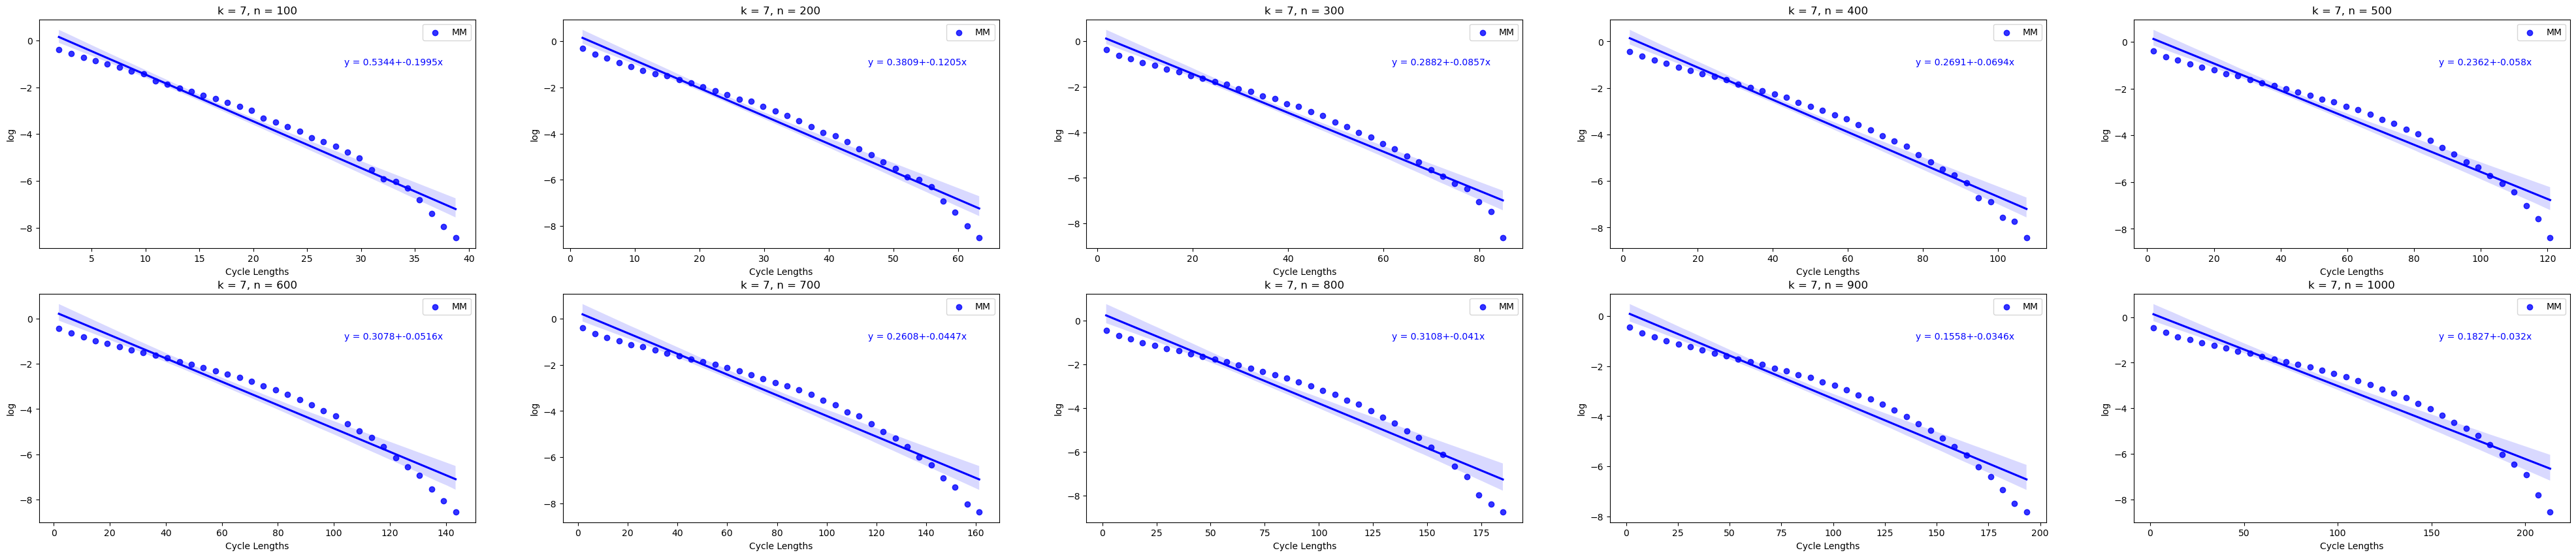

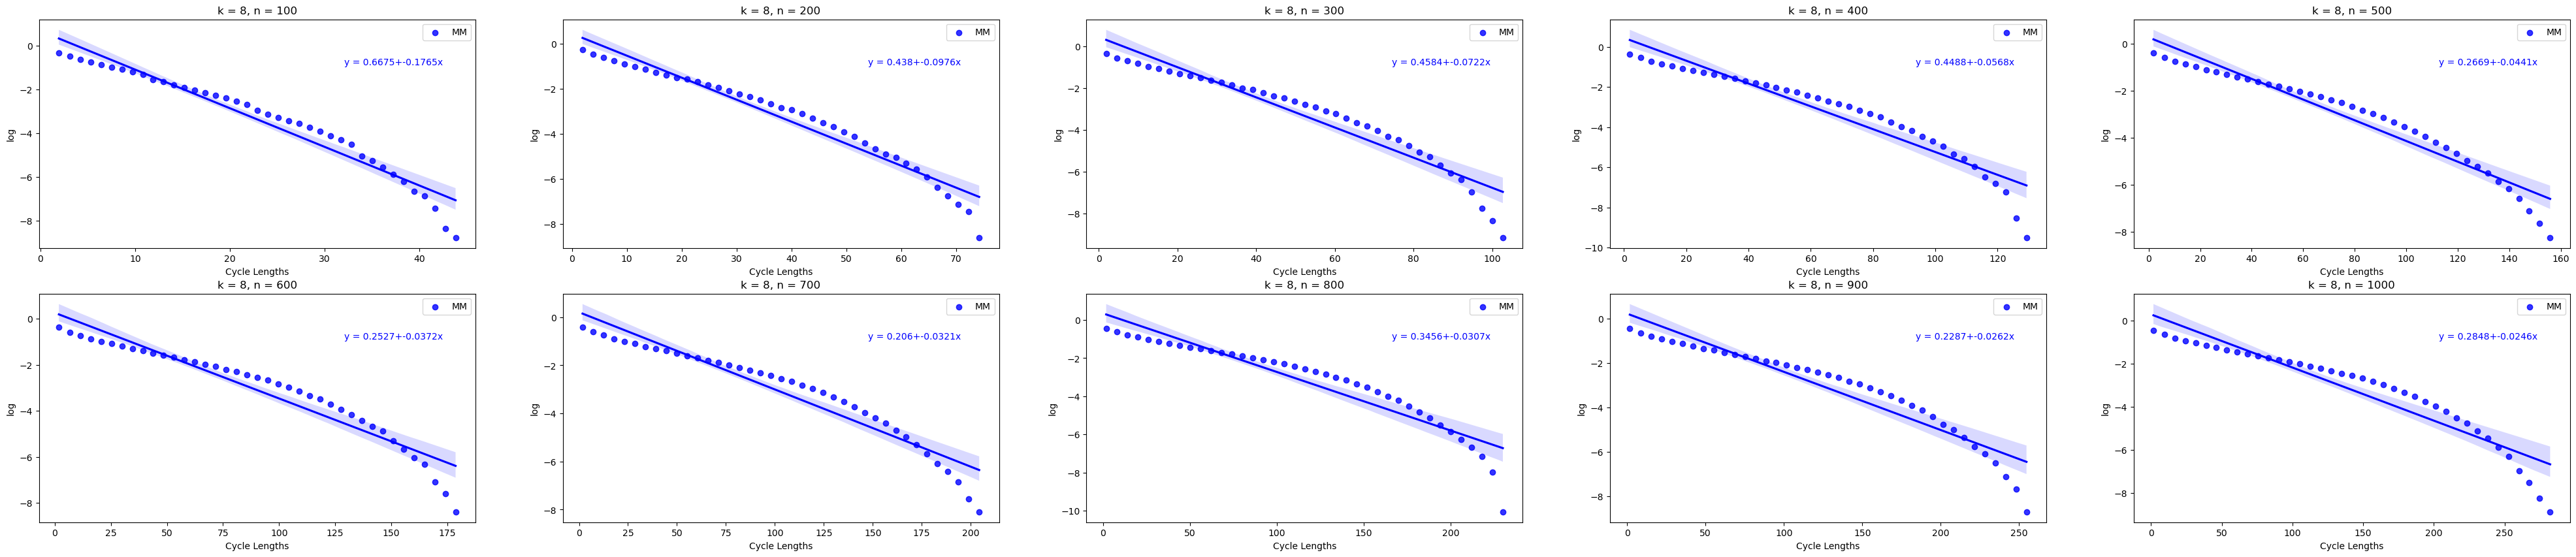

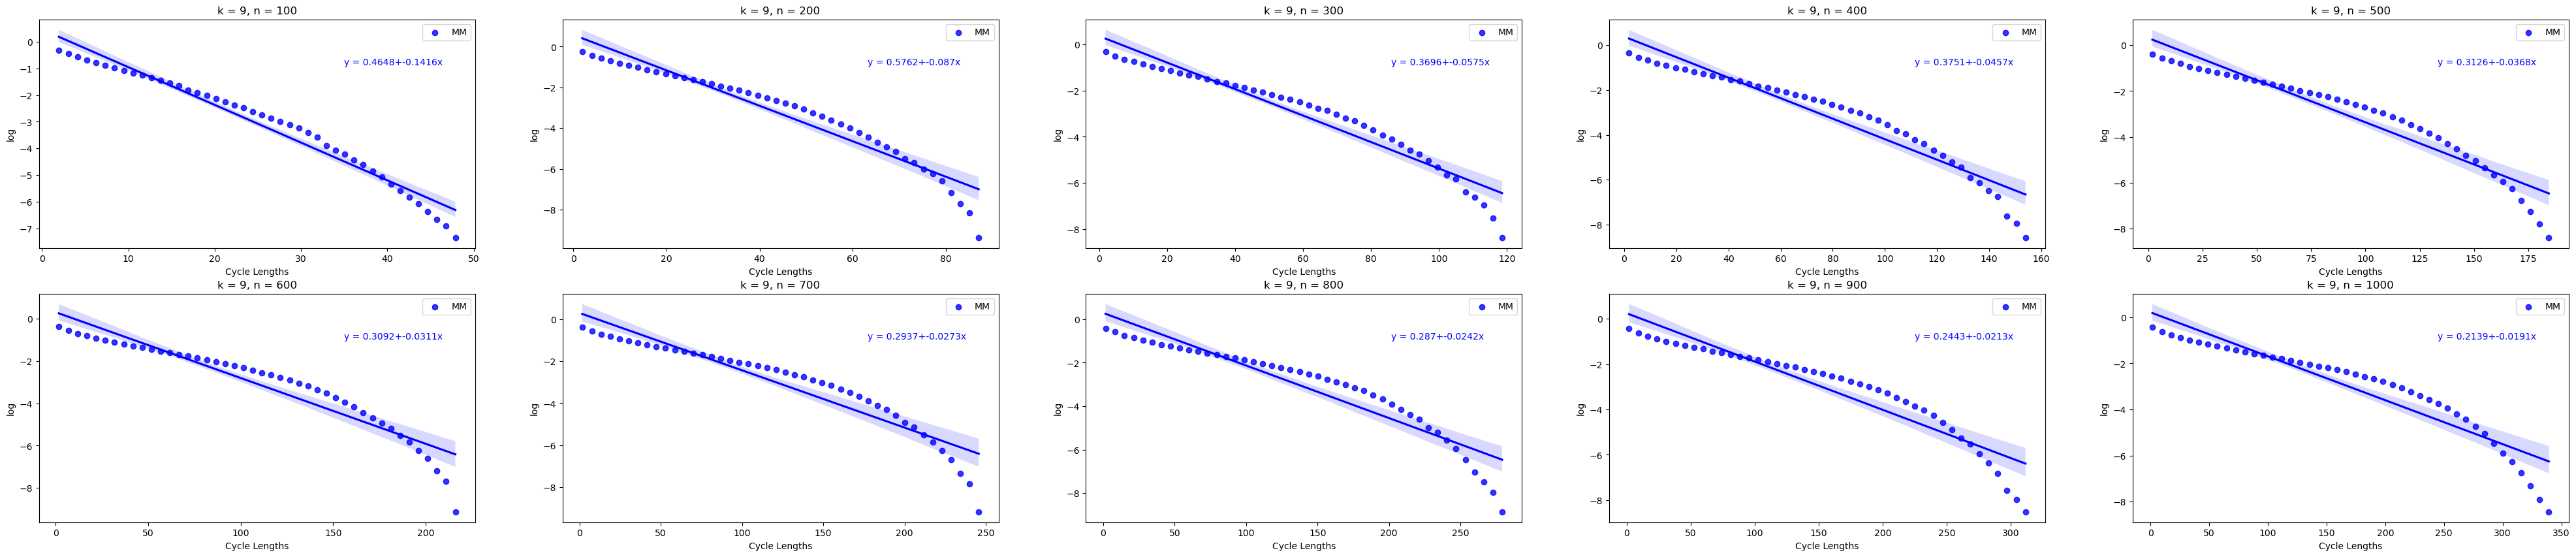

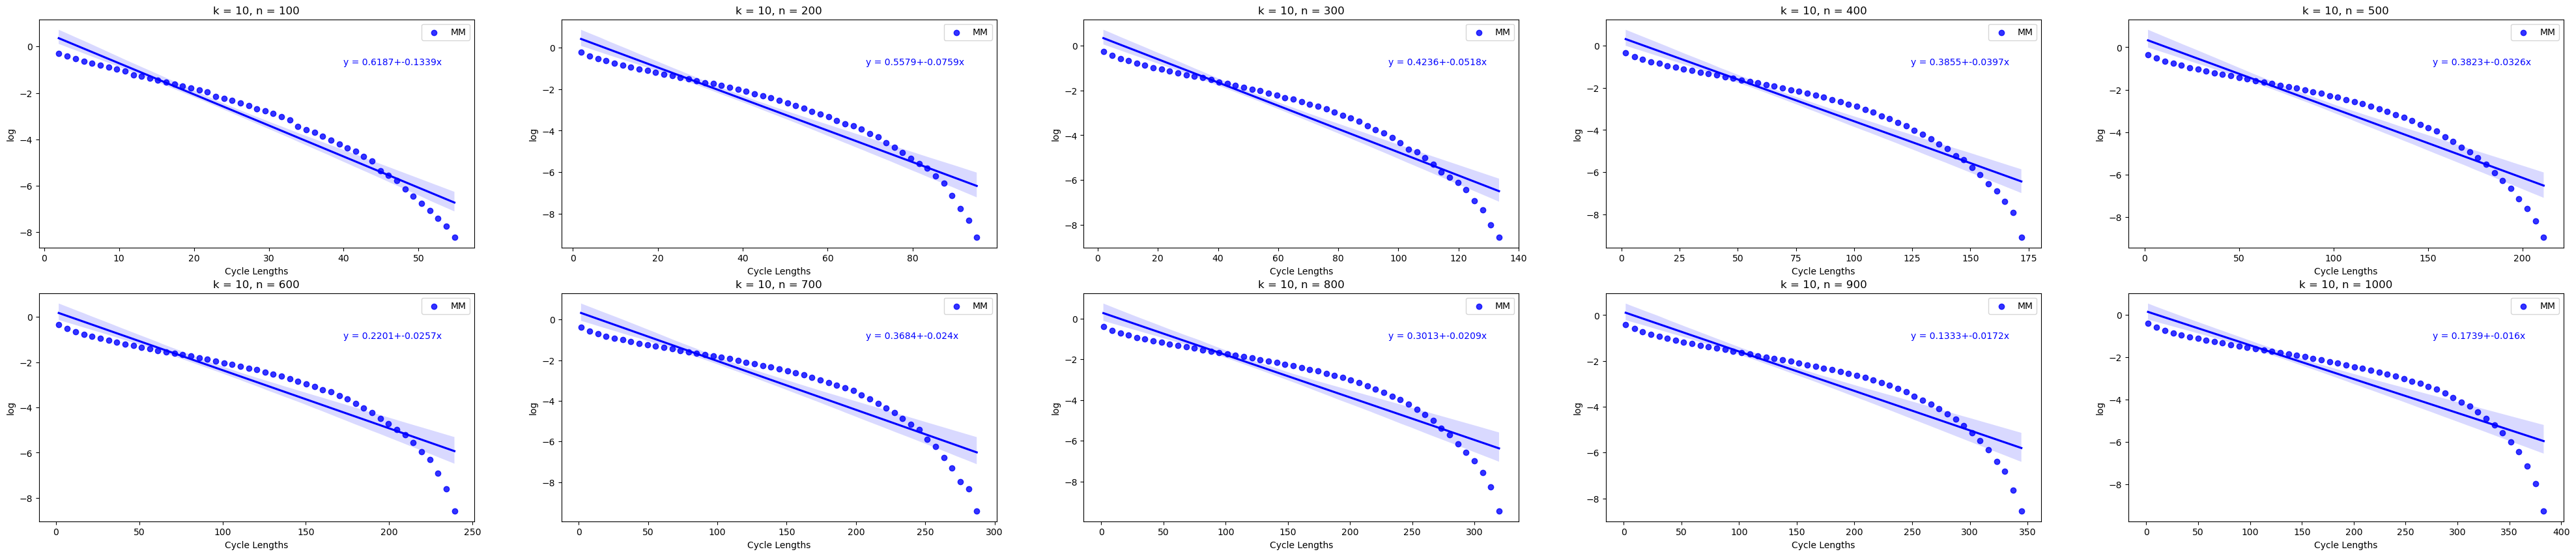

In [59]:
for k in ks:
    make_graph(k)